# YouTube Meta Data

In diesem Beispiel werde ich mit Hilfer der PyTube library (hier github einfügen) die Metadaten der Top 10 videos der AfD im bundestag abrufen und in einem DF zusammenfassen

In [ ]:
!pip install pytube

In [1]:
from pytube import YouTube
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/jovyan/work/Developer/YouTubeMetaData/AfDFraktionimBundestag_videos.csv")

In [3]:
df

,title,link
0,Typisch🚦: Auch im Verkehr völlig ideologiegetr...,https://www.youtube.com/watch?v=ZmIELW8dmhM
1,Lobbyismus-Industrie - Geldströme offenlegen u...,https://www.youtube.com/watch?v=dOPw3dZGi3E
2,Die Bürokratie in unserem Land ist unerträglic...,https://www.youtube.com/watch?v=R0TM5Y2toT0
3,💥💶Strompreis: An Doppelmoral ist das nicht meh...,https://www.youtube.com/watch?v=zPeGoXCHoMY
4,Deutschland moralisiert sich zu Tode! Jürgen B...,https://www.youtube.com/watch?v=svikkW9UK_g
...,...,...
83,Von wegen nachhaltig: Sie träumen eine Lebensl...,https://www.youtube.com/watch?v=-0JkT_LunoU
84,Hamas auf unseren Straßen: Dieser Islam gehört...,https://www.youtube.com/watch?v=AIOZVoEkh_c
85,Hamas-Terror: Matthias Moosdorf kritisiert die...,https://www.youtube.com/watch?v=fuiDd7yPkMM
86,Alexander Gauland zur Lage im Nahen Osten! - A...,https://www.youtube.com/watch?v=HjAlsENa1LI


In [4]:

def get_video_info(url):
    try:
        yt = YouTube(url)
        return pd.Series({

            'length in sec': yt.length,
            'views': yt.views,
            'publish-date': yt.publish_date,
            'thumbnail-Url': yt.thumbnail_url
        })
    except Exception as e:
        print(f"Fehler beim Abrufen der Daten für {url}: {e}")
        return pd.Series({

            'length in sec': None,
            'views': None,
            'publish-date': None,
            'thumbnail-Url': None
        })

# Extrahieren der Videoinformationen und Hinzufügen als neue Spalten
video_infos = df['link'].apply(get_video_info)
df = pd.concat([df, video_infos], axis=1)


In [5]:
df.head(6)

,title,link,length in sec,views,publish-date,thumbnail-Url
0,Typisch🚦: Auch im Verkehr völlig ideologiegetr...,https://www.youtube.com/watch?v=ZmIELW8dmhM,188,18690,2023-10-26,https://i.ytimg.com/vi/ZmIELW8dmhM/hq720.jpg
1,Lobbyismus-Industrie - Geldströme offenlegen u...,https://www.youtube.com/watch?v=dOPw3dZGi3E,196,9991,2023-10-26,https://i.ytimg.com/vi/dOPw3dZGi3E/hq720.jpg
2,Die Bürokratie in unserem Land ist unerträglic...,https://www.youtube.com/watch?v=R0TM5Y2toT0,218,5582,2023-10-26,https://i.ytimg.com/vi/R0TM5Y2toT0/hq720.jpg
3,💥💶Strompreis: An Doppelmoral ist das nicht meh...,https://www.youtube.com/watch?v=zPeGoXCHoMY,248,33952,2023-10-26,https://i.ytimg.com/vi/zPeGoXCHoMY/hq720.jpg
4,Deutschland moralisiert sich zu Tode! Jürgen B...,https://www.youtube.com/watch?v=svikkW9UK_g,256,38825,2023-10-25,https://i.ytimg.com/vi/svikkW9UK_g/hq720.jpg
5,Frieden für die Koreanische Halbinsel - Petr B...,https://www.youtube.com/watch?v=VnVnNyZM0Pc,218,10148,2023-10-25,https://i.ytimg.com/vi/VnVnNyZM0Pc/hq720.jpg


In [6]:
df.head()


,title,link,length in sec,views,publish-date,thumbnail-Url
0,Typisch🚦: Auch im Verkehr völlig ideologiegetr...,https://www.youtube.com/watch?v=ZmIELW8dmhM,188,18690,2023-10-26,https://i.ytimg.com/vi/ZmIELW8dmhM/hq720.jpg
1,Lobbyismus-Industrie - Geldströme offenlegen u...,https://www.youtube.com/watch?v=dOPw3dZGi3E,196,9991,2023-10-26,https://i.ytimg.com/vi/dOPw3dZGi3E/hq720.jpg
2,Die Bürokratie in unserem Land ist unerträglic...,https://www.youtube.com/watch?v=R0TM5Y2toT0,218,5582,2023-10-26,https://i.ytimg.com/vi/R0TM5Y2toT0/hq720.jpg
3,💥💶Strompreis: An Doppelmoral ist das nicht meh...,https://www.youtube.com/watch?v=zPeGoXCHoMY,248,33952,2023-10-26,https://i.ytimg.com/vi/zPeGoXCHoMY/hq720.jpg
4,Deutschland moralisiert sich zu Tode! Jürgen B...,https://www.youtube.com/watch?v=svikkW9UK_g,256,38825,2023-10-25,https://i.ytimg.com/vi/svikkW9UK_g/hq720.jpg


In [7]:
df.head(0)

,title,link,length in sec,views,publish-date,thumbnail-Url


In [8]:
# Angenommen, df ist Ihr DataFrame
# Konvertieren Sie 'publish-date' in ein Datumsformat
df['publish-date'] = pd.to_datetime(df['publish-date'])

# Zählen, wie viele Videos an jedem Tag veröffentlicht wurden
video_counts = df['publish-date'].value_counts().sort_index()

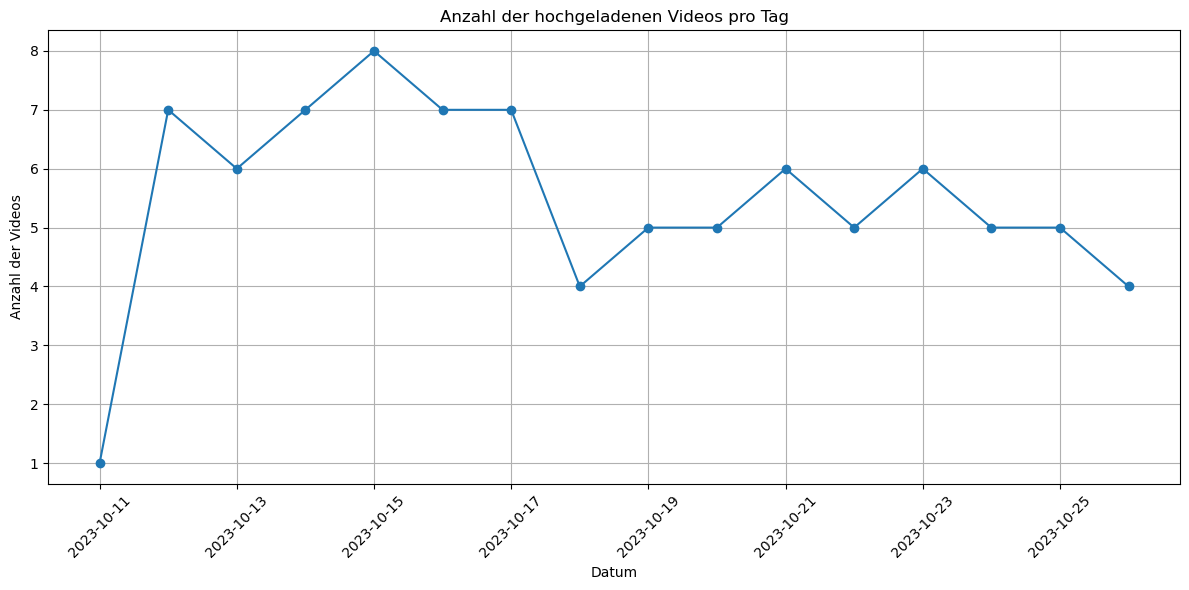

In [9]:
# Erstellen eines Linien-Diagramms
plt.figure(figsize=(12, 6))
plt.plot(video_counts.index, video_counts.values, marker='o', linestyle='-')  # Linie mit Markern

# Titel und Achsenbeschriftungen hinzufügen
plt.title("Anzahl der hochgeladenen Videos pro Tag")
plt.xlabel("Datum")
plt.ylabel("Anzahl der Videos")

# Optimierung der Darstellung
plt.xticks(rotation=45)  # Dreht die x-Achsen-Beschriftungen, falls nötig
plt.grid(True)  # Fügt ein Gitter hinzu
plt.tight_layout()  # Passt das Layout an

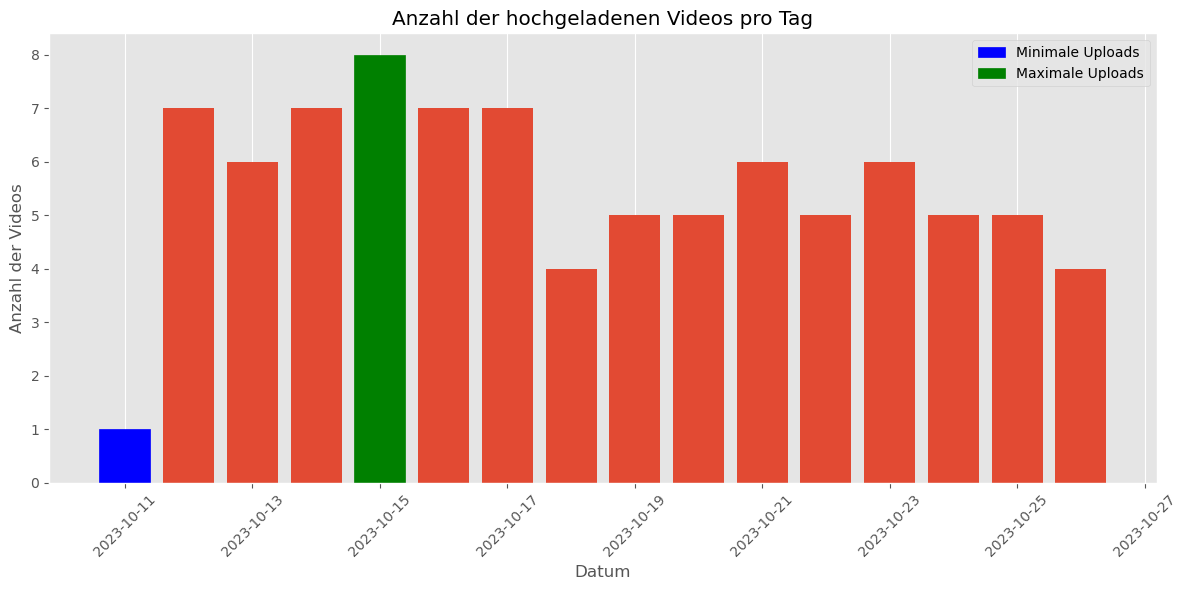

In [13]:
# Erstellen eines Balkendiagramms
plt.style.use('ggplot')

plt.figure(figsize=(12, 6))
bars = plt.bar(video_counts.index, video_counts.values)

# Markieren des minimalen und maximalen Werts
min_count = video_counts.min()
max_count = video_counts.max()

# Hervorheben von Min/Max im Balkendiagramm
for bar in bars:
    if bar.get_height() == min_count:
        bar.set_color('blue')
        min_bar = bar  # Für die Legende
    elif bar.get_height() == max_count:
        bar.set_color('green')
        max_bar = bar  # Für die Legende

# Titel und Achsenbeschriftungen hinzufügen
plt.title("Anzahl der hochgeladenen Videos pro Tag")
plt.xlabel("Datum")
plt.ylabel("Anzahl der Videos")

# Legende hinzufügen
plt.legend([min_bar, max_bar], ['Minimale Uploads', 'Maximale Uploads'])

# Optimierung der Darstellung
plt.xticks(rotation=45)
plt.grid(axis='y')  # Nur horizontale Linien
plt.tight_layout()

In [14]:
# Berechnung des Pearson-Korrelationskoeffizienten
correlation = df['length in sec'].corr(df['views'])
print(f"Der Pearson-Korrelationskoeffizient zwischen Videolänge und Views ist: {correlation}")


Der Pearson-Korrelationskoeffizient zwischen Videolänge und Views ist: -0.012866351141925839


Text(0.8, 0.9, 'Pearson r: -0.01')

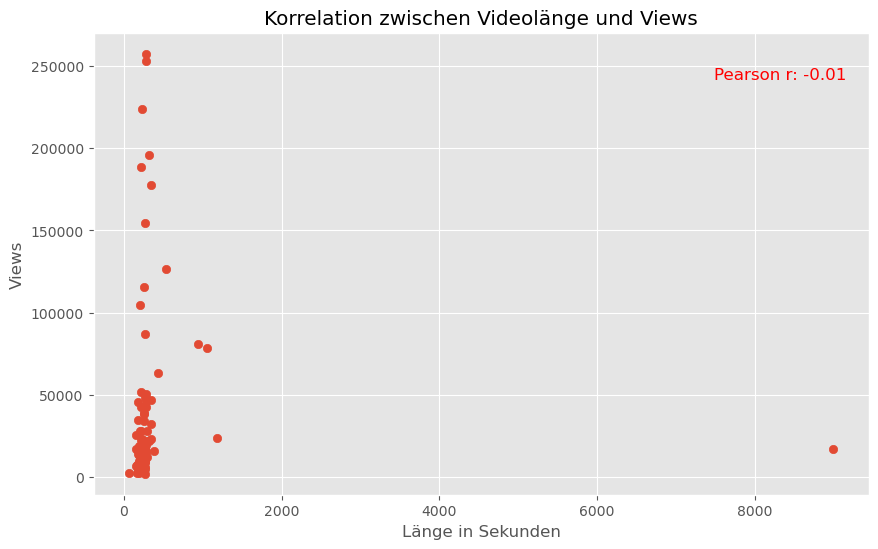

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.scatter(df['length in sec'], df['views'])
plt.title('Korrelation zwischen Videolänge und Views')
plt.xlabel('Länge in Sekunden')
plt.ylabel('Views')
plt.text(
    x = 0.8,  # X-Position der Annotation im Plot
    y = 0.9,  # Y-Position der Annotation im Plot
    s = f'Pearson r: {correlation:.2f}',
    fontsize = 12,
    color = 'red',
    transform=plt.gca().transAxes  # Setzt die Koordinaten relativ zum Achsenbereich
)


In [28]:
# Berechnung Pearson-r zwischen upload date und views
correlation_DATE_VIEWS = df['publish-date'].corr(df['views'])

In [29]:
correlation_DATE_VIEWS

-0.16729387075096444

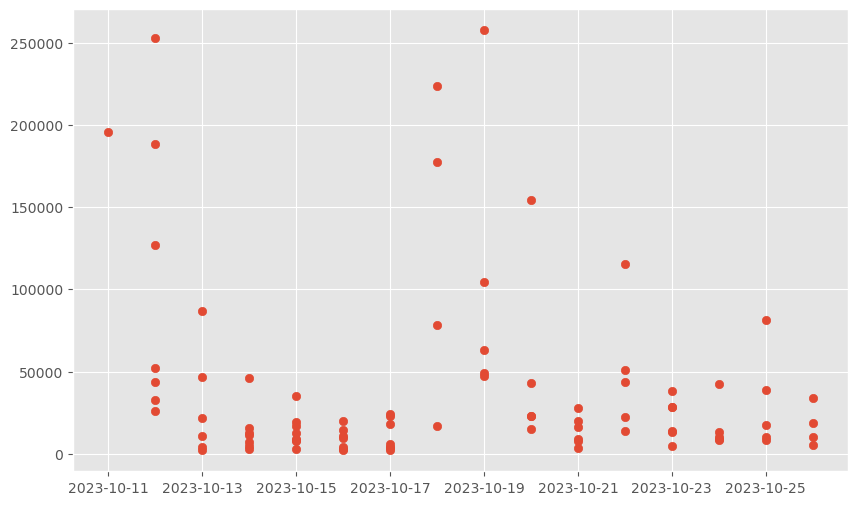

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.scatter(df['publish-date'], df['views'])


In [31]:
correlation_DATE_LENGTH = df['publish-date'].corr(df['length in sec'])

In [32]:
correlation_DATE_LENGTH

-0.005117469068103142

In [34]:
df.to_csv('sampleDataEdit.csv', index=False)
